Homework 1
==========


In this homework...

* Analyze the distribution of measurements of pesticide content in water supplies in California (measurements between 6/1/2020 and 8/1/2020, provided by EPA)

* Determine moments of the distribution based on an ensemble average and using the distribution

* Demonstrate how a predicted distribution based on the first two moments can lead to erroneous behavior

* Analyze measured properties including Nitrate, Nitrite, and Arsenic (see data file for more properties)

Problem statement
-----------------------

1. Extract the 'CharacteristicName' equal to 'Nitrate' from the exp_data. Find the number of data points 'n_e' (note, 'len(x)' gives the length of an array 'x').

2. Generate a probability density function for the distribution of nitrate concentrations using the histogram properties ('x0', 'xf', and 'n_bin') used in the exercise. Show that this histogram does not get agreement between $\langle c \rangle$ and $\langle c^{2} \rangle$ calculated from the data and from the histogram.

3. Vary the maximum value in the histogram 'xf' and the number of bins 'n_bin' until we get agreement (precision of 1 decimal place) between $\langle c \rangle$ and $\langle c^{2} \rangle$ calculated from the data and from the histogram. Note, the maximum value 'xf' should be larger than the largest value in the set (note, 'np.max(x)' gives the largest value in the array 'x').

4. Plot the histogram against a proposed model $f_{x}(x) = \lambda \exp (-\lambda x)$, noting the property $\langle x \rangle = 1/\lambda$. Generate a linear plot and a semilog plot (i.e. $\log_{10} f_{x}$ versus $x$).

5. Find the first 6 moments of the distribution. Plot these moments against the theoretical predictions on a semilog plot (i.e. $\log_{10} \langle x^{m} \rangle$ versus $m$)

6. Determine the lower bound of the histogram for the case of there being only 1 measurement that falls within a bin (i.e. only one instance of measured value). Replot the histogram on a semilog axis with this minimum value as a horizontal line.

7. Now perform the same analyses on a 'CharacteristicName' of your choice. Options include 'Nitrite' and 'Arsenic', but other options can be found in the raw data file ('data/ca_water.csv').

Import the necessary modules

In [1]:
import numpy as np
import sys
import pandas as pd
sys.path.append('../')
import matplotlib.pyplot as plt

Load the data [https://www.epa.gov/waterdata/water-quality-data-download]

In [2]:
data = pd.read_csv("data/ca_water.csv", low_memory = False)
exp_data = data[['CharacteristicName', 'ResultMeasureValue']]

In [3]:
def isfloat(value):
    try:
        float(value)
        return True
    except ValueError:
        return False

1. Extract the 'CharacteristicName' equal to 'Nitrate' from the exp_data. Find the number of data points 'n_e' (note, 'len(x)' gives the length of an array 'x').

In [4]:
x = np.array(exp_data[exp_data['CharacteristicName'] == 'Nitrate']['ResultMeasureValue'])
contaminant = np.array([])
for i in range(len(x)):
    if isfloat(x[i]):
        if np.logical_not(np.isnan(float(x[i]))):
            contaminant = np.append(contaminant, float(x[i]))
    else:
        contaminant = np.append(contaminant, 0)
print(len(contaminant))

343


Note: If the graders rerun the cells, please reset the kernel since some of the code was pasted into part 7 and I believe the variables will change the current answers. Thanks!

2. Generate a probability density function for the distribution of nitrate concentrations using the histogram properties ('x0', 'xf', and 'n_bin') used in the exercise.

Disagreement between histogram and data in first two moments:
6.9912973760932955 856.8678789591838
0.9366232746044214 2.0625966170429253


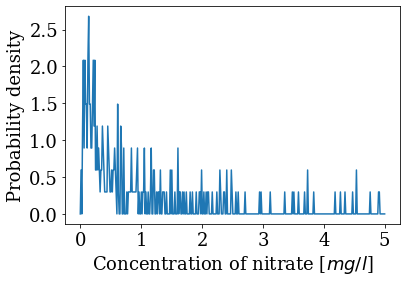

In [5]:
x0 = 0
xf = 5
n_bin = 400
x = np.linspace(x0, xf, n_bin)

delta_x = x[1] - x[0]
x_bin = np.append(x,x[-1] + delta_x) - delta_x / 2
prob, x_bin = np.histogram(contaminant, bins=x_bin, density = True)

plt.figure()
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

plt.plot(x, prob)

plt.xlabel('Concentration of nitrate [$mg/l$]')
plt.ylabel('Probability density')

print('Disagreement between histogram and data in first two moments:')
conc_ave = np.mean(contaminant) #first and second moment from data
conc2_ave = np.mean(contaminant ** 2)
print(conc_ave, conc2_ave)

conc_ave_hist = np.sum(x ** 1 * prob * delta_x) #first and second moment from data
conc2_ave_hist = np.sum(x ** 2 * prob * delta_x) #x is a vector of bins 
print(conc_ave_hist, conc2_ave_hist)

plt.show()

3. Vary the maximum value in the histogram 'xf' and the number of bins 'n_bin' until we get agreement (precision of 2 decimal places) between $\langle c \rangle$ and $\langle c^{2} \rangle$ calculated from the data and from the histogram.

In [6]:
x0 = 0
xf = np.max(contaminant)+100
n_bin = 15000
x = np.linspace(x0, xf, n_bin)

delta_x = x[1] - x[0]
x_bin = np.append(x,x[-1] + delta_x) - delta_x / 2
prob, x_bin = np.histogram(contaminant, bins=x_bin, density = True)

conc_ave = np.mean(contaminant) #first and second moment from data
conc2_ave = np.mean(contaminant ** 2)
print(conc_ave, conc2_ave)

conc_ave_hist = np.sum(x ** 1 * prob * delta_x) #first and second moment from data
conc2_ave_hist = np.sum(x ** 2 * prob * delta_x) #x is a vector of bins 
print(conc_ave_hist, conc2_ave_hist)

6.9912973760932955 856.8678789591838
6.991548707717272 856.8619033927041


4. Plot the histogram against a proposed model $f_{x}(x) = \lambda \exp (-\lambda x)$, noting the property $\langle x \rangle = 1/\lambda$. Generate a linear plot and a semilog plot (i.e. $\log_{10} f_{x}$ versus $x$).

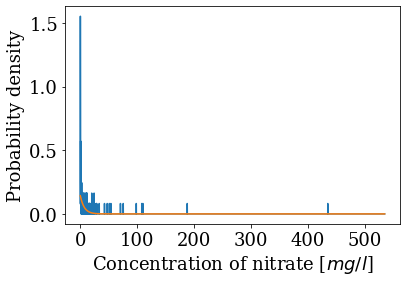

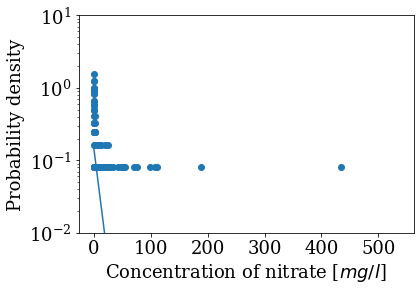

In [7]:
plt.figure()
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

lam = 1 / conc_ave_hist

#linear
plt.plot(x, prob)
plt.plot(x, lam * np.exp(-lam * x))

plt.xlabel('Concentration of nitrate [$mg/l$]')
plt.ylabel('Probability density')

plt.show()

#semi-log
plt.scatter(x, prob)
plt.plot(x, lam * np.exp(-lam * x))

plt.yscale('log')

plt.xlabel('Concentration of nitrate [$mg/l$]')
plt.ylabel('Probability density')

plt.ylim([1e-2,10])
plt.show()

5. Find the first 6 moments of the distribution. Plot these moments against the theoretical predictions on a semilog plot (i.e. $\log_{10} \langle x^{m} \rangle$ versus $m$)

In [8]:
#Print values for first 6 moments
n_m = 6
moment = np.zeros((n_m, 2))
moment_th = np.zeros(n_m)

lam = 1 / conc_ave_hist
for i_m in range(n_m):
    moment[i_m, 0] = np.sum(x ** i_m * prob * delta_x)
    moment[i_m, 1] = np.mean(contaminant ** i_m)
    moment_th[i_m] = np.math.factorial(i_m) / lam ** i_m

First 6 moments (predicted):
1.0
6.9915
856.86
2.7424e+05
1.0937e+08
4.622e+10

First 6 moments (observed):
1.0
6.9913
856.87
2.7426e+05
1.0939e+08
4.6228e+10


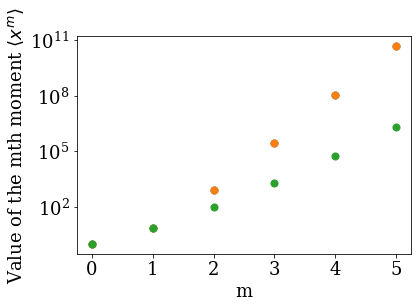

In [9]:
plt.figure()
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

lam = 1 / conc_ave_hist
mom_ind = np.linspace(0, n_m - 1, n_m)

plt.scatter(mom_ind, moment[:,0], color = 'C0', s = 50)
plt.scatter(mom_ind, moment[:,1], color = 'C1', s = 50)
plt.scatter(mom_ind, moment_th, color = 'C2', s = 50)

plt.yscale('log')

plt.xlabel('m')
plt.ylabel(r'Value of the mth moment $\langle x^{m} \rangle$')

print('First 6 moments (predicted):')
for i in range(6):
    print(f'{moment[i,0]:.5}')
    
print('\nFirst 6 moments (observed):')
for i in range(6):
    print(f'{moment[i,1]:.5}')

plt.show()

6. Determine the lower bound of the histogram for the case of there being only 1 measurement that falls within a bin (i.e. only one instance of measured value). Replot the histogram on a semilog axis with this minimum value as a horizontal line.



In [10]:
#find smallest value in prob array and plot a horizontal line equivalent to that value (~0.02)
minval = np.min(prob[np.nonzero(prob)])
print(minval)

0.08173619247426515


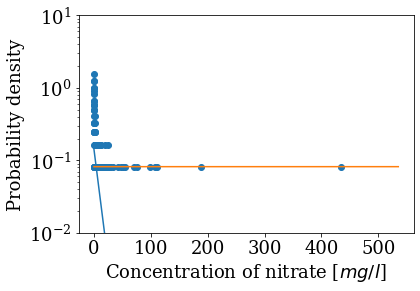

In [11]:
plt.figure()
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)
lam = 1 / conc_ave_hist

plt.scatter(x, prob)
plt.plot(x, lam * np.exp(-lam * x))

min_array = np.zeros(len(x))
min_array.fill(minval)
plt.plot(x, min_array)

plt.yscale('log')

plt.xlabel('Concentration of nitrate [$mg/l$]')
plt.ylabel('Probability density')

plt.ylim([1e-2,10])
plt.show()

7. Now perform the same analyses on a 'CharacteristicName' of your choice. Options include 'Nitrite' and 'Arsenic', but other options can be found in the raw data file ('data/ca_water.csv').

In [12]:
x = np.array(exp_data[exp_data['CharacteristicName'] == 'Arsenic']['ResultMeasureValue'])
arsenic = np.array([])
for i in range(len(x)):
    if isfloat(x[i]):
        if np.logical_not(np.isnan(float(x[i]))):
            arsenic = np.append(arsenic, float(x[i]))
    else:
        arsenic = np.append(arsenic, 0)
print(len(arsenic))

58


Disagreement between histogram and data in first two moments:
6.9912973760932955 856.8678789591838
1.2582796276405228 2.689639534748059


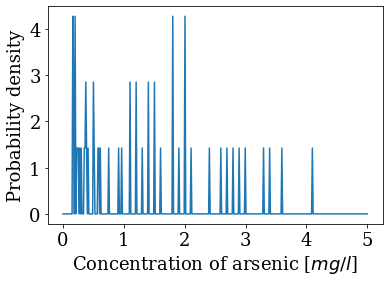

In [13]:
x0 = 0
xf = 5
n_bin = 400
x = np.linspace(x0, xf, n_bin)

delta_x = x[1] - x[0]
x_bin = np.append(x,x[-1] + delta_x) - delta_x / 2
prob, x_bin = np.histogram(arsenic, bins=x_bin, density = True)

plt.figure()
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

print('Disagreement between histogram and data in first two moments:')
conc_ave = np.mean(contaminant) #first and second moment from data
conc2_ave = np.mean(contaminant ** 2)
print(conc_ave, conc2_ave)

conc_ave_hist = np.sum(x ** 1 * prob * delta_x) #first and second moment from data
conc2_ave_hist = np.sum(x ** 2 * prob * delta_x) #x is a vector of bins 
print(conc_ave_hist, conc2_ave_hist)

plt.plot(x, prob)

plt.xlabel('Concentration of arsenic [$mg/l$]')
plt.ylabel('Probability density')

plt.show()

In [14]:
x0 = 0
xf = np.max(arsenic)+100
n_bin = 15000
x = np.linspace(x0, xf, n_bin)

delta_x = x[1] - x[0]
x_bin = np.append(x,x[-1] + delta_x) - delta_x / 2
prob, x_bin = np.histogram(arsenic, bins=x_bin, density = True)

conc_ave = np.mean(arsenic) #first and second moment from data
conc2_ave = np.mean(arsenic ** 2)
print(conc_ave, conc2_ave)

conc_ave_hist = np.sum(x ** 1 * prob * delta_x) #first and second moment from data
conc2_ave_hist = np.sum(x ** 2 * prob * delta_x) #x is a vector of bins 
print(conc_ave_hist, conc2_ave_hist)

1.7762068965517244 15.416886206896551
1.7763018684004426 15.41468994331718


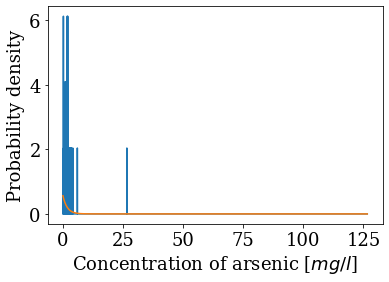

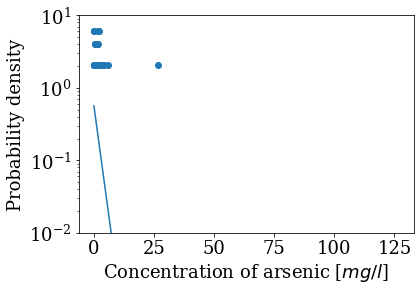

In [15]:
plt.figure()
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

lam = 1 / conc_ave_hist

#linear
plt.plot(x, prob)
plt.plot(x, lam * np.exp(-lam * x))

plt.xlabel('Concentration of arsenic [$mg/l$]')
plt.ylabel('Probability density')

plt.show()

#semi-log
plt.scatter(x, prob)
plt.plot(x, lam * np.exp(-lam * x))

plt.yscale('log')

plt.xlabel('Concentration of arsenic [$mg/l$]')
plt.ylabel('Probability density')

plt.ylim([1e-2,10])
plt.show()

First 6 moments (predicted):
1.0
1.7763
15.415
335.01
8669.9
2.2964e+05

First 6 moments (observed):
1.0
1.7762
15.417
335.14
8674.7
2.298e+05


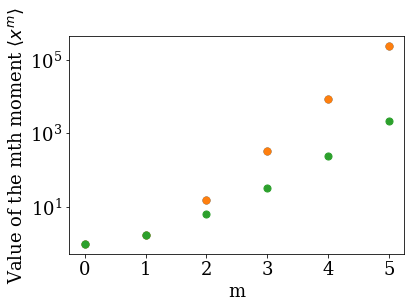

In [16]:
#Print values for first 6 moments
n_m = 6
moment = np.zeros((n_m, 2))
moment_th = np.zeros(n_m)

lam = 1 / conc_ave_hist
for i_m in range(n_m):
    moment[i_m, 0] = np.sum(x ** i_m * prob * delta_x)
    moment[i_m, 1] = np.mean(arsenic ** i_m)
    moment_th[i_m] = np.math.factorial(i_m) / lam ** i_m
    
plt.figure()
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

lam = 1 / conc_ave_hist
mom_ind = np.linspace(0, n_m - 1, n_m)

plt.scatter(mom_ind, moment[:,0], color = 'C0', s = 50)
plt.scatter(mom_ind, moment[:,1], color = 'C1', s = 50)
plt.scatter(mom_ind, moment_th, color = 'C2', s = 50)

plt.yscale('log')

plt.xlabel('m')
plt.ylabel(r'Value of the mth moment $\langle x^{m} \rangle$')

print('First 6 moments (predicted):')
for i in range(6):
    print(f'{moment[i,0]:.5}')
    
print('\nFirst 6 moments (observed):')
for i in range(6):
    print(f'{moment[i,1]:.5}')

plt.show()

2.0426812660020492


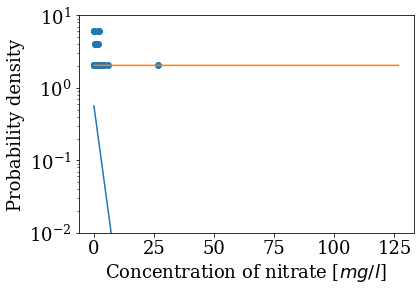

In [17]:
minval = np.min(prob[np.nonzero(prob)])
print(minval)

plt.figure()
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)
lam = 1 / conc_ave_hist

plt.scatter(x, prob)
plt.plot(x, lam * np.exp(-lam * x))

min_array = np.zeros(len(x))
min_array.fill(minval)
plt.plot(x, min_array)

plt.yscale('log')

plt.xlabel('Concentration of nitrate [$mg/l$]')
plt.ylabel('Probability density')

plt.ylim([1e-2,10])
plt.show()